In [1]:
# Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.impute import SimpleImputer

# Additional utilities
from scipy import stats
import joblib

# Create directory for saving graphs
if not os.path.exists('credit_scoring_graphs'):
    os.makedirs('credit_scoring_graphs')

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Step 2: Load and explore the dataset
# Load the dataset
df = pd.read_csv('credit_scoring_dataset.csv')

# Basic exploration
print("=" * 50)
print("DATASET EXPLORATION")
print("=" * 50)

print(f"Dataset Shape: {df.shape}")
print(f"Number of customers: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
display(df.describe())

print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\nTarget Variable Distribution:")
target_dist = df['default'].value_counts()
print(target_dist)
print(f"\nDefault Rate: {(target_dist[1] / len(df) * 100):.2f}%")

DATASET EXPLORATION
Dataset Shape: (500000, 15)
Number of customers: 500000
Number of features: 15

First 5 rows:


,age,income,employment_length,loan_amount,credit_score,debt_to_income_ratio,years_at_residence,number_of_credit_lines,number_of_late_payments,credit_utilization,has_previous_default,loan_term,home_ownership,loan_purpose,default
0,56,11687,18,35618,377,0.635991,0,2,8,0.420165,0,24,RENT,MEDICAL,0
1,69,89628,16,21276,785,0.724999,13,7,3,0.246481,1,60,MORTGAGE,DEBT_CONSOLIDATION,1
2,46,41702,5,16056,766,0.251377,12,11,1,0.733944,0,60,MORTGAGE,MEDICAL,0
3,32,44520,23,19807,602,0.147488,18,11,9,0.246679,0,48,RENT,BUSINESS,0
4,60,13225,16,25849,583,0.288681,14,14,8,0.640109,0,24,MORTGAGE,PERSONAL,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      500000 non-null  int64  
 1   income                   500000 non-null  int64  
 2   employment_length        500000 non-null  int64  
 3   loan_amount              500000 non-null  int64  
 4   credit_score             500000 non-null  int64  
 5   debt_to_income_ratio     500000 non-null  float64
 6   years_at_residence       500000 non-null  int64  
 7   number_of_credit_lines   500000 non-null  int64  
 8   number_of_late_payments  500000 non-null  int64  
 9   credit_utilization       500000 non-null  float64
 10  has_previous_default     500000 non-null  int64  
 11  loan_term                500000 non-null  int64  
 12  home_ownership           500000 non-null  object 
 13  loan_purpose             500000 non-null  ob

,age,income,employment_length,loan_amount,credit_score,debt_to_income_ratio,years_at_residence,number_of_credit_lines,number_of_late_payments,credit_utilization,has_previous_default,loan_term,default
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,43.498546,50094.016342,19.522088,25531.442106,574.783088,0.450054,9.500682,7.502918,4.493656,0.499896,0.150210,35.967216,0.300000
std,15.000945,19806.932970,11.537650,14146.630277,158.841452,0.202107,5.768756,4.032426,2.870603,0.231001,0.357277,16.972245,0.458258
min,18.000000,0.000000,0.000000,1000.000000,300.000000,0.100001,0.000000,1.000000,0.000000,0.100000,0.000000,12.000000,0.000000
25%,31.000000,36511.000000,10.000000,13287.000000,437.000000,0.275231,5.000000,4.000000,2.000000,0.299388,0.000000,24.000000,0.000000
50%,44.000000,50020.000000,20.000000,25559.000000,575.000000,0.449768,10.000000,8.000000,4.000000,0.500133,0.000000,36.000000,0.000000
75%,56.000000,63490.000000,30.000000,37782.000000,712.000000,0.625059,15.000000,11.000000,7.000000,0.699791,0.000000,48.000000,1.000000
max,69.000000,142426.000000,39.000000,49999.000000,849.000000,0.799998,19.000000,14.000000,9.000000,0.899999,1.000000,60.000000,1.000000



Missing Values:
Series([], dtype: int64)

Target Variable Distribution:
default
0    350000
1    150000
Name: count, dtype: int64

Default Rate: 30.00%


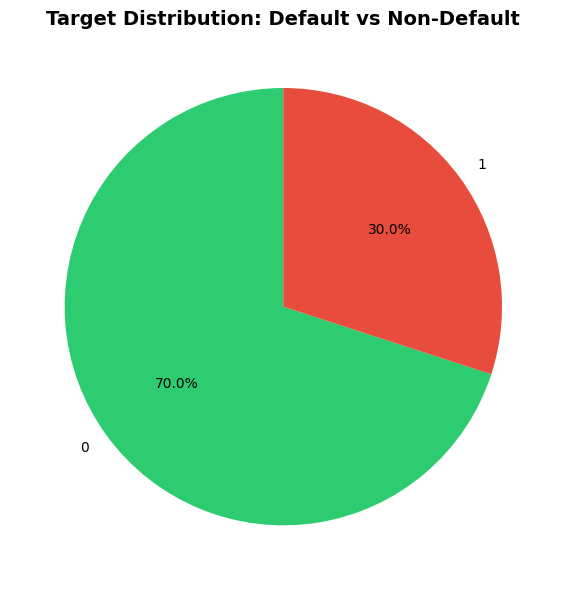

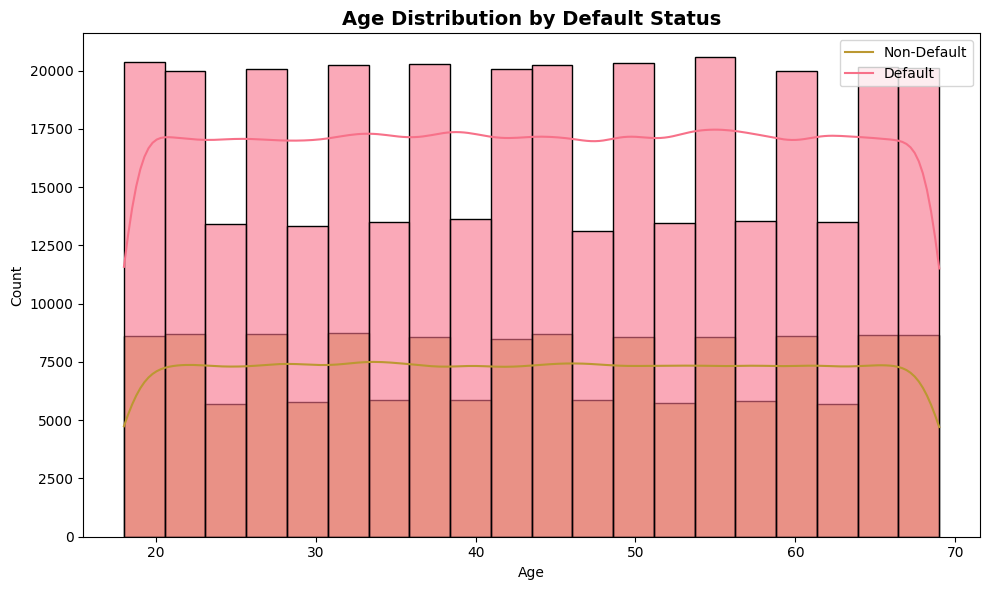

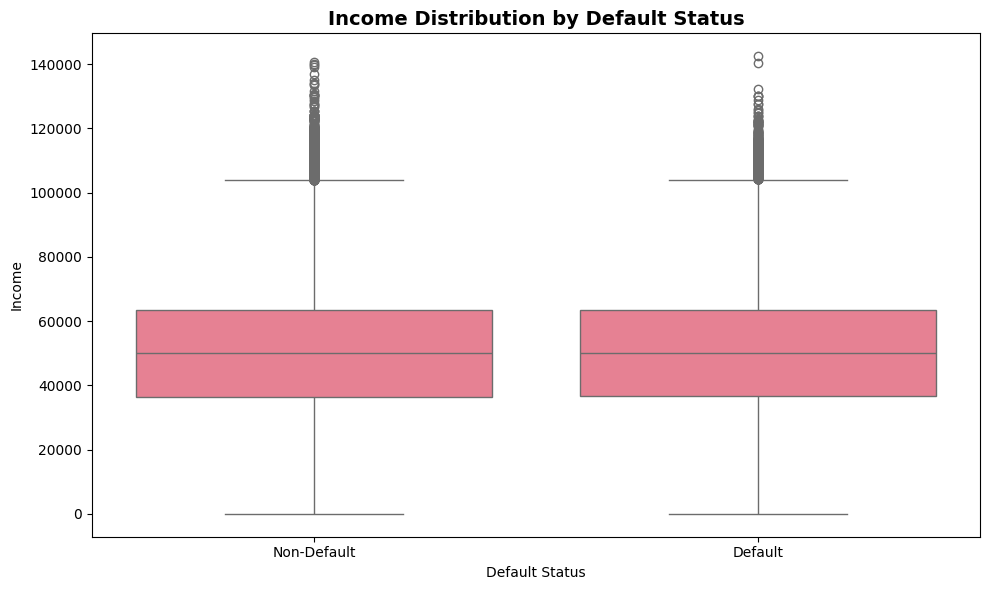

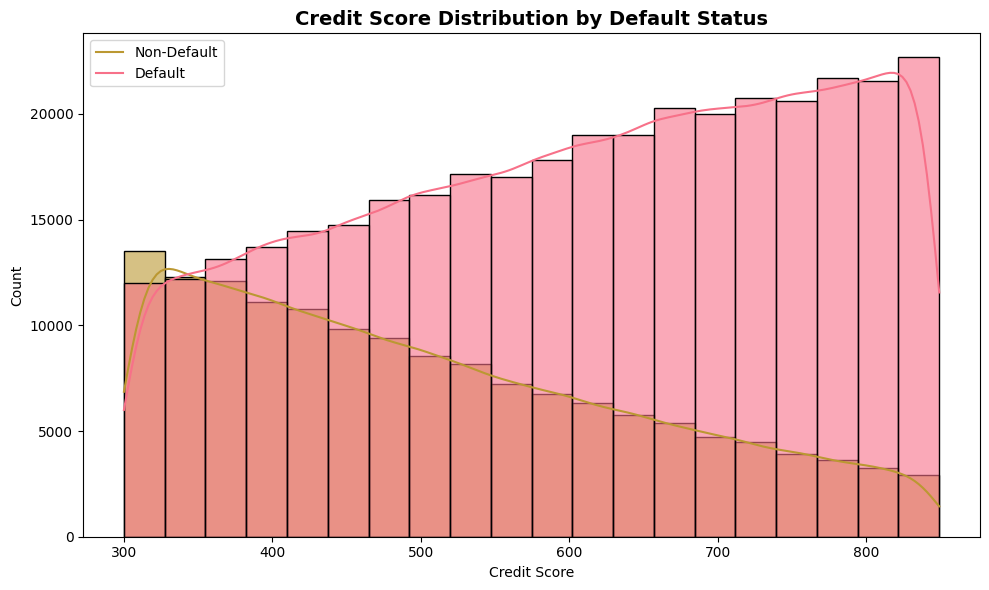

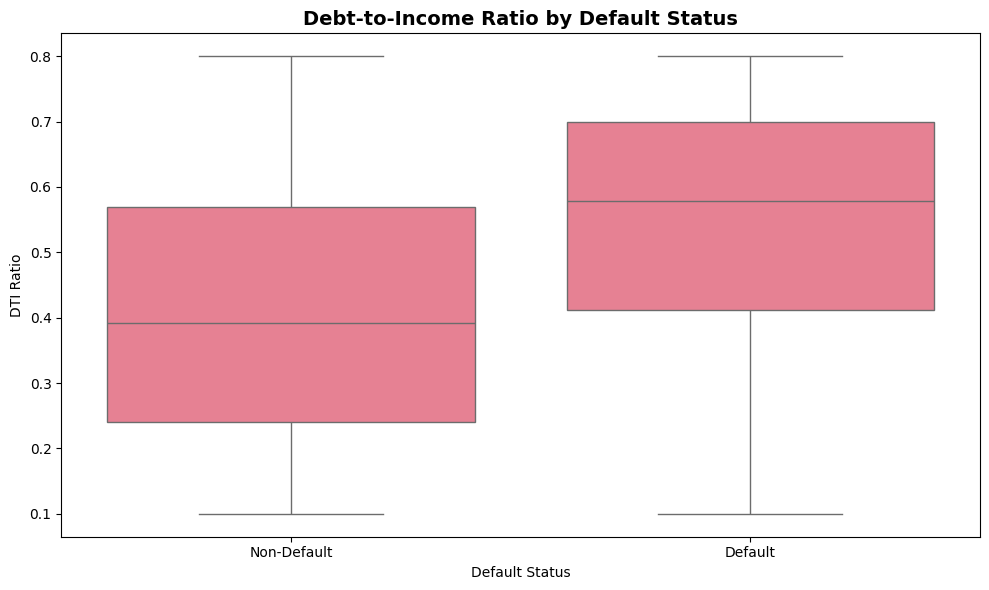

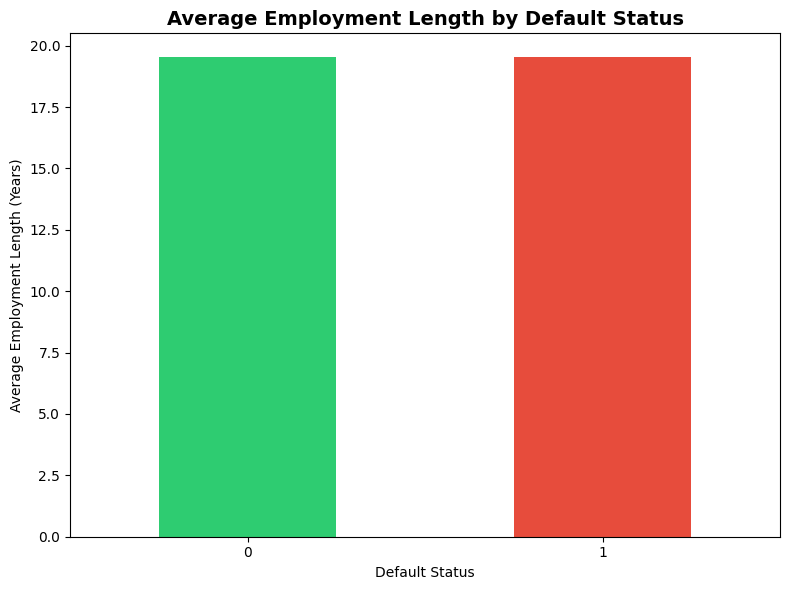

<Figure size 1000x600 with 0 Axes>

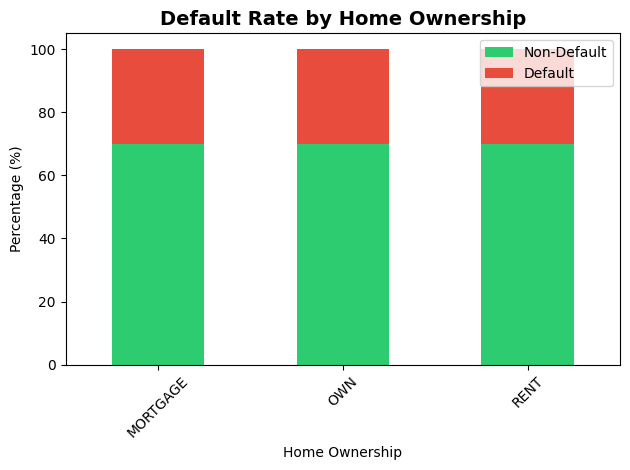

<Figure size 1200x600 with 0 Axes>

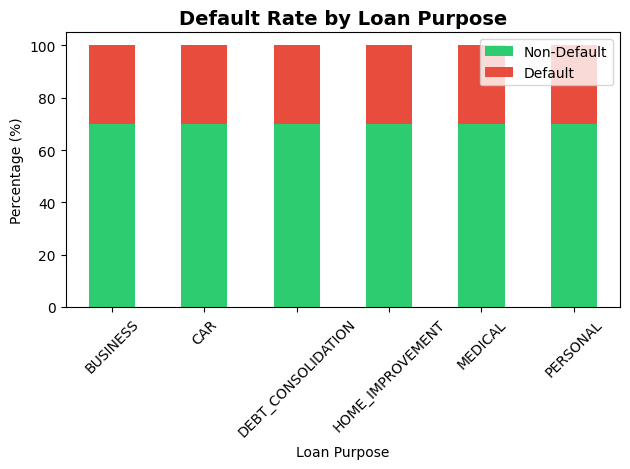

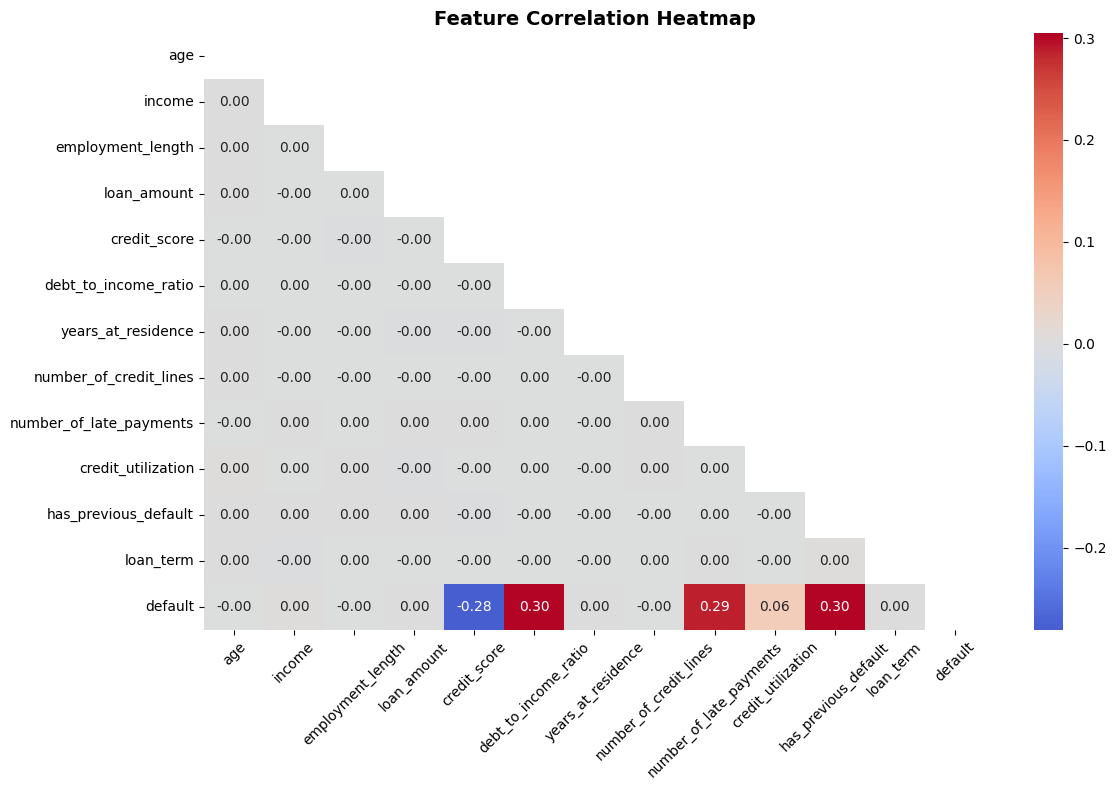

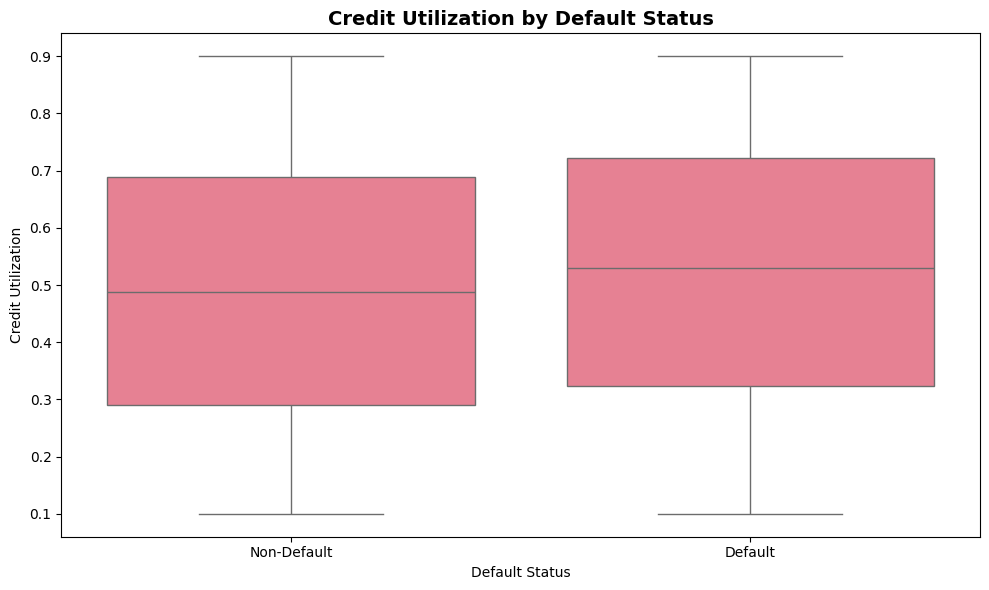

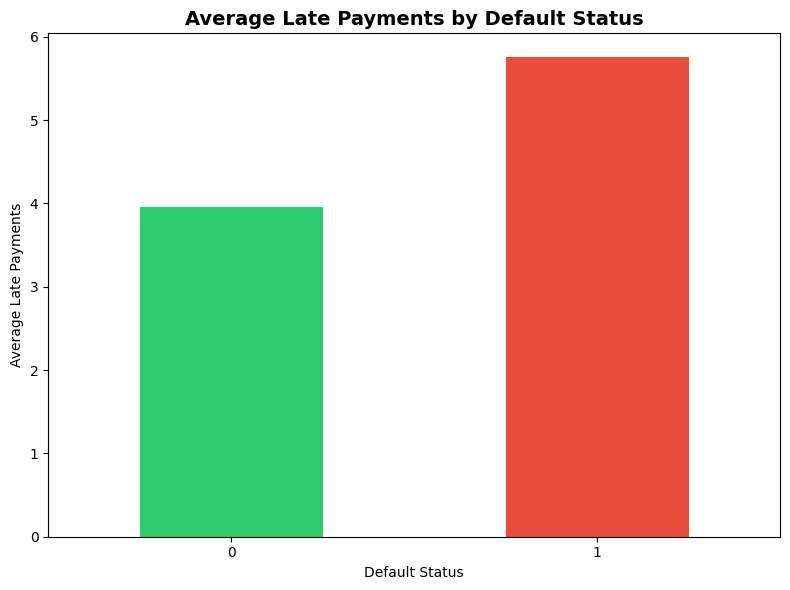

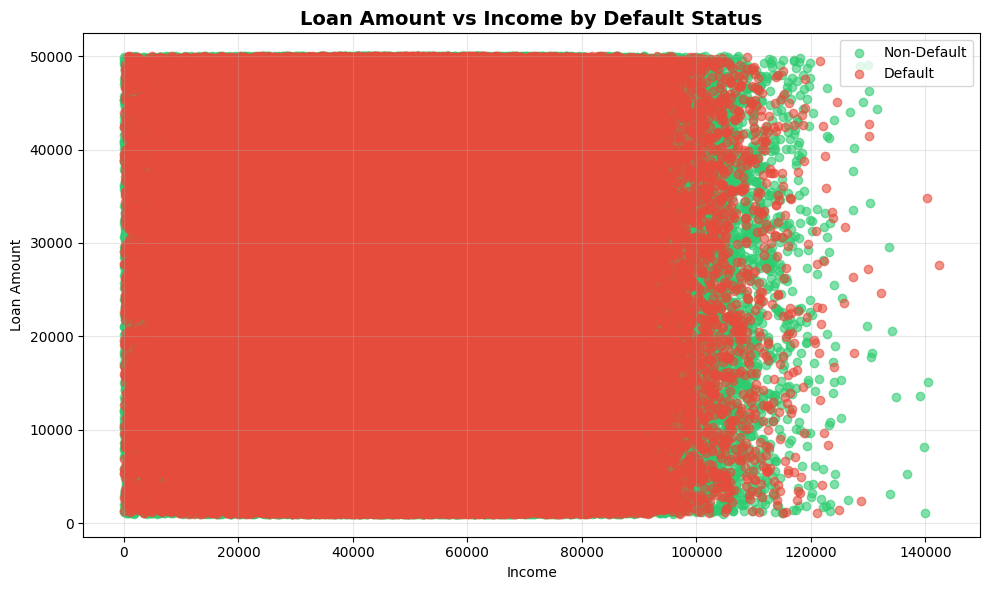

All individual graphs saved successfully in 'credit_scoring_graphs' folder!
STATISTICAL ANALYSIS
T-test Results (Non-Default vs Default):
------------------------------------------------------------
age                       | t-stat:    0.767 | p-value: 0.443006 | Significant: NO
income                    | t-stat:   -2.663 | p-value: 0.007748 | Significant: YES
credit_score              | t-stat:  206.785 | p-value: 0.000000 | Significant: YES
debt_to_income_ratio      | t-stat: -224.912 | p-value: 0.000000 | Significant: YES
employment_length         | t-stat:    0.218 | p-value: 0.827600 | Significant: NO
number_of_late_payments   | t-stat: -212.112 | p-value: 0.000000 | Significant: YES


In [3]:
# Step 3: Comprehensive Data Analysis with Charts - FIXED VERSION

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create individual figures for each chart to prevent merging

# Chart 1: Target Variable Distribution
plt.figure(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c']
df['default'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Target Distribution: Default vs Non-Default', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.savefig('credit_scoring_graphs/1_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 2: Age Distribution by Default Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='default', bins=20, kde=True, alpha=0.6)
plt.title('Age Distribution by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Non-Default', 'Default'])
plt.tight_layout()
plt.savefig('credit_scoring_graphs/2_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 3: Income Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='default', y='income')
plt.title('Income Distribution by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default Status')
plt.ylabel('Income')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.tight_layout()
plt.savefig('credit_scoring_graphs/3_income_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 4: Credit Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='credit_score', hue='default', bins=20, kde=True, alpha=0.6)
plt.title('Credit Score Distribution by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(['Non-Default', 'Default'])
plt.tight_layout()
plt.savefig('credit_scoring_graphs/4_credit_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 5: Debt-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='default', y='debt_to_income_ratio')
plt.title('Debt-to-Income Ratio by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default Status')
plt.ylabel('DTI Ratio')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.tight_layout()
plt.savefig('credit_scoring_graphs/5_dti_ratio.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 6: Employment Length
plt.figure(figsize=(8, 6))
employment_default = df.groupby('default')['employment_length'].mean()
employment_default.plot(kind='bar', color=colors)
plt.title('Average Employment Length by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default Status')
plt.ylabel('Average Employment Length (Years)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('credit_scoring_graphs/6_employment_length.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 7: Home Ownership
plt.figure(figsize=(10, 6))
home_ownership_cross = pd.crosstab(df['home_ownership'], df['default'], normalize='index') * 100
home_ownership_cross.plot(kind='bar', stacked=True, color=colors)
plt.title('Default Rate by Home Ownership', fontsize=14, fontweight='bold')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage (%)')
plt.legend(['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('credit_scoring_graphs/7_home_ownership.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 8: Loan Purpose
plt.figure(figsize=(12, 6))
loan_purpose_cross = pd.crosstab(df['loan_purpose'], df['default'], normalize='index') * 100
loan_purpose_cross.plot(kind='bar', stacked=True, color=colors)
plt.title('Default Rate by Loan Purpose', fontsize=14, fontweight='bold')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage (%)')
plt.legend(['Non-Default', 'Default'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('credit_scoring_graphs/8_loan_purpose.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 9: Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', mask=mask)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('credit_scoring_graphs/9_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 10: Credit Utilization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='default', y='credit_utilization')
plt.title('Credit Utilization by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default Status')
plt.ylabel('Credit Utilization')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.tight_layout()
plt.savefig('credit_scoring_graphs/10_credit_utilization.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 11: Number of Late Payments
plt.figure(figsize=(8, 6))
late_payments_avg = df.groupby('default')['number_of_late_payments'].mean()
late_payments_avg.plot(kind='bar', color=colors)
plt.title('Average Late Payments by Default Status', fontsize=14, fontweight='bold')
plt.xlabel('Default Status')
plt.ylabel('Average Late Payments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('credit_scoring_graphs/11_late_payments.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart 12: Loan Amount vs Income
plt.figure(figsize=(10, 6))
plt.scatter(df[df['default'] == 0]['income'], df[df['default'] == 0]['loan_amount'], 
            alpha=0.6, label='Non-Default', color=colors[0])
plt.scatter(df[df['default'] == 1]['income'], df[df['default'] == 1]['loan_amount'], 
            alpha=0.6, label='Default', color=colors[1])
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income by Default Status', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('credit_scoring_graphs/12_loan_vs_income.png', dpi=300, bbox_inches='tight')
plt.show()

print("All individual graphs saved successfully in 'credit_scoring_graphs' folder!")

# Additional Statistical Analysis
print("=" * 50)
print("STATISTICAL ANALYSIS")
print("=" * 50)

# T-test for significant differences
numerical_features = ['age', 'income', 'credit_score', 'debt_to_income_ratio', 
                     'employment_length', 'number_of_late_payments']

print("T-test Results (Non-Default vs Default):")
print("-" * 60)
for feature in numerical_features:
    non_default = df[df['default'] == 0][feature]
    default = df[df['default'] == 1][feature]
    t_stat, p_value = stats.ttest_ind(non_default, default)
    significance = "YES" if p_value < 0.05 else "NO"
    print(f"{feature:25} | t-stat: {t_stat:8.3f} | p-value: {p_value:.6f} | Significant: {significance}")

In [4]:
# Step 4: Feature Engineering and Preprocessing - FIXED VERSION

print("=" * 50)
print("FEATURE ENGINEERING")
print("=" * 50)

# Create a copy for preprocessing
df_processed = df.copy()

# 4.1 Create new features - WITH ERROR HANDLING
# Loan to Income Ratio - Handle division by zero
df_processed['loan_to_income_ratio'] = df_processed['loan_amount'] / df_processed['income'].replace(0, 1)  # Replace 0 income with 1 to avoid division by zero

# Check for infinite values and replace them
df_processed['loan_to_income_ratio'] = df_processed['loan_to_income_ratio'].replace([np.inf, -np.inf], np.nan)

# Fill any remaining NaN values with a high value (indicating high risk)
df_processed['loan_to_income_ratio'].fillna(10, inplace=True)

# Age Groups
df_processed['age_group'] = pd.cut(df_processed['age'], 
                                  bins=[0, 25, 35, 45, 55, 65, 100],
                                  labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Credit Score Categories
df_processed['credit_score_category'] = pd.cut(df_processed['credit_score'],
                                              bins=[0, 580, 670, 740, 800, 850],
                                              labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

# Payment Behavior Score
df_processed['payment_behavior_score'] = 100 - (df_processed['number_of_late_payments'] * 10 + 
                                               df_processed['credit_utilization'] * 20)

# Ensure payment_behavior_score is within reasonable bounds
df_processed['payment_behavior_score'] = np.clip(df_processed['payment_behavior_score'], 0, 100)

print("New features created:")
print("- loan_to_income_ratio")
print("- age_group") 
print("- credit_score_category")
print("- payment_behavior_score")

# Check for any infinite or NaN values
print(f"\nData quality check:")
print(f"NaN values in loan_to_income_ratio: {df_processed['loan_to_income_ratio'].isna().sum()}")
print(f"Infinite values in loan_to_income_ratio: {np.isinf(df_processed['loan_to_income_ratio']).sum()}")
print(f"Min loan_to_income_ratio: {df_processed['loan_to_income_ratio'].min():.4f}")
print(f"Max loan_to_income_ratio: {df_processed['loan_to_income_ratio'].max():.4f}")

# 4.2 Handle categorical variables
categorical_cols = ['home_ownership', 'loan_purpose', 'age_group', 'credit_score_category']

# One-hot encoding
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f"\nShape after encoding: {df_encoded.shape}")

# 4.3 Prepare features and target
# Check if customer_id exists before dropping
columns_to_drop = ['default']
if 'customer_id' in df_encoded.columns:
    columns_to_drop.append('customer_id')

X = df_encoded.drop(columns_to_drop, axis=1)
y = df_encoded['default']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 4.4 Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# 4.5 Scale numerical features - WITH PROPER ERROR HANDLING
scaler = StandardScaler()

# Define numerical features - only those that exist and are numerical
numerical_features = ['age', 'income', 'employment_length', 'loan_amount', 'credit_score', 
                     'debt_to_income_ratio', 'years_at_residence', 'number_of_credit_lines',
                     'number_of_late_payments', 'credit_utilization', 'loan_to_income_ratio',
                     'payment_behavior_score']

# Filter to only include features that exist in our dataset
numerical_features = [feat for feat in numerical_features if feat in X_train.columns]

print(f"\nNumerical features to scale: {numerical_features}")

# Check for any infinite or NaN values before scaling
print("\nData quality check before scaling:")
for feature in numerical_features:
    nan_count = X_train[feature].isna().sum()
    inf_count = np.isinf(X_train[feature]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"  {feature}: {nan_count} NaN, {inf_count} infinite")

# Handle any remaining NaN values
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

for feature in numerical_features:
    # Fill NaN with median
    if X_train_clean[feature].isna().any():
        median_val = X_train_clean[feature].median()
        X_train_clean[feature].fillna(median_val, inplace=True)
        X_test_clean[feature].fillna(median_val, inplace=True)
    
    # Replace infinite values with large finite values
    if np.isinf(X_train_clean[feature]).any():
        max_val = X_train_clean[feature][~np.isinf(X_train_clean[feature])].max()
        min_val = X_train_clean[feature][~np.isinf(X_train_clean[feature])].min()
        
        X_train_clean[feature] = X_train_clean[feature].replace(np.inf, max_val * 2)
        X_train_clean[feature] = X_train_clean[feature].replace(-np.inf, min_val * 2)
        X_test_clean[feature] = X_test_clean[feature].replace(np.inf, max_val * 2)
        X_test_clean[feature] = X_test_clean[feature].replace(-np.inf, min_val * 2)

# Now scale the cleaned data
X_train_scaled = X_train_clean.copy()
X_test_scaled = X_test_clean.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train_clean[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_clean[numerical_features])

print("\nFeature scaling completed!")
print(f"Numerical features scaled: {numerical_features}")

# Verify scaling worked
print(f"\nScaled data verification:")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"Any NaN in scaled data: {X_train_scaled[numerical_features].isna().sum().sum()}")
print(f"Any infinite in scaled data: {np.isinf(X_train_scaled[numerical_features]).sum().sum()}")

FEATURE ENGINEERING
New features created:
- loan_to_income_ratio
- age_group
- credit_score_category
- payment_behavior_score

Data quality check:
NaN values in loan_to_income_ratio: 0
Infinite values in loan_to_income_ratio: 0
Min loan_to_income_ratio: 0.0081
Max loan_to_income_ratio: 38804.0000

Shape after encoding: (500000, 31)
Features shape: (500000, 30)
Target shape: (500000,)

Training set: (400000, 30)
Test set: (100000, 30)

Numerical features to scale: ['age', 'income', 'employment_length', 'loan_amount', 'credit_score', 'debt_to_income_ratio', 'years_at_residence', 'number_of_credit_lines', 'number_of_late_payments', 'credit_utilization', 'loan_to_income_ratio', 'payment_behavior_score']

Data quality check before scaling:

Feature scaling completed!
Numerical features scaled: ['age', 'income', 'employment_length', 'loan_amount', 'credit_score', 'debt_to_income_ratio', 'years_at_residence', 'number_of_credit_lines', 'number_of_late_payments', 'credit_utilization', 'loan_to_

In [5]:
# Add this cell right after loading the data for comprehensive data cleaning

# Step 2.5: Data Cleaning and Quality Check
print("=" * 50)
print("DATA QUALITY CHECK AND CLEANING")
print("=" * 50)

# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Check for infinite values
print("\nChecking for infinite values:")
for col in df.select_dtypes(include=[np.number]).columns:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        print(f"  {col}: {inf_count} infinite values")

# Basic data cleaning
df_clean = df.copy()

# Handle potential issues in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    # Replace infinite values with NaN
    df_clean[col] = df_clean[col].replace([np.inf, -np.inf], np.nan)
    
    # Fill NaN with median for numerical columns
    if df_clean[col].isna().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Filled NaN in {col} with median: {median_val}")

# Ensure all values are finite
print(f"\nAfter cleaning:")
print(f"Total NaN values: {df_clean.isnull().sum().sum()}")
print(f"Total infinite values: {np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()}")

# Replace the original df with cleaned version
df = df_clean
print("\nData cleaning completed!")

# Now continue with the rest of the analysis...

DATA QUALITY CHECK AND CLEANING
Missing values before cleaning:
age                        0
income                     0
employment_length          0
loan_amount                0
credit_score               0
debt_to_income_ratio       0
years_at_residence         0
number_of_credit_lines     0
number_of_late_payments    0
credit_utilization         0
has_previous_default       0
loan_term                  0
home_ownership             0
loan_purpose               0
default                    0
dtype: int64

Checking for infinite values:

After cleaning:
Total NaN values: 0
Total infinite values: 0

Data cleaning completed!


In [6]:
# QUICK FIX VERSION - Replace Step 4 with this simplified version:

print("=" * 50)
print("FEATURE ENGINEERING - SIMPLIFIED VERSION")
print("=" * 50)

# Create a copy for preprocessing
df_processed = df.copy()

# Simple feature engineering without complex ratios
df_processed['age_group'] = pd.cut(df_processed['age'], 
                                  bins=[0, 25, 35, 45, 55, 65, 100],
                                  labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

df_processed['credit_score_category'] = pd.cut(df_processed['credit_score'],
                                              bins=[0, 580, 670, 740, 800, 850],
                                              labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

# One-hot encoding
categorical_cols = ['home_ownership', 'loan_purpose', 'age_group', 'credit_score_category']
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop('default', axis=1)
y = df_encoded['default']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale only basic numerical features (avoid problematic ratios)
safe_numerical_features = ['age', 'income', 'employment_length', 'loan_amount', 'credit_score', 
                          'debt_to_income_ratio', 'years_at_residence', 'number_of_credit_lines',
                          'number_of_late_payments', 'credit_utilization']

# Filter to only include features that exist
safe_numerical_features = [feat for feat in safe_numerical_features if feat in X_train.columns]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[safe_numerical_features] = scaler.fit_transform(X_train[safe_numerical_features])
X_test_scaled[safe_numerical_features] = scaler.transform(X_test[safe_numerical_features])

print("\nFeature scaling completed!")
print(f"Safe numerical features scaled: {safe_numerical_features}")

FEATURE ENGINEERING - SIMPLIFIED VERSION
Training set: (400000, 28)
Test set: (100000, 28)

Feature scaling completed!
Safe numerical features scaled: ['age', 'income', 'employment_length', 'loan_amount', 'credit_score', 'debt_to_income_ratio', 'years_at_residence', 'number_of_credit_lines', 'number_of_late_payments', 'credit_utilization']


In [7]:
# Step 5: Build Credit Scoring Models

print("=" * 50)
print("CREDIT SCORING MODELS")
print("=" * 50)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{'-'*30}")
    print(f"Training {name}...")
    print(f"{'-'*30}")
    
    # Train model
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    
    # Cross-validation
    if name == 'Logistic Regression':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    print(f"Cross-Validation AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Compare models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'AUC Score': [results[name]['auc_score'] for name in results.keys()]
}).sort_values('AUC Score', ascending=False)

display(comparison_df)

# Save model comparison as CSV
comparison_df.to_csv('credit_scoring_graphs/model_comparison.csv', index=False)
print("Model comparison saved as 'credit_scoring_graphs/model_comparison.csv'")

CREDIT SCORING MODELS

------------------------------
Training Logistic Regression...
------------------------------
Accuracy: 0.8127
AUC Score: 0.8713
Cross-Validation AUC: 0.8708 (+/- 0.0028)

------------------------------
Training Random Forest...
------------------------------
Accuracy: 0.8079
AUC Score: 0.8634
Cross-Validation AUC: 0.8621 (+/- 0.0030)

------------------------------
Training Gradient Boosting...
------------------------------
Accuracy: 0.8124
AUC Score: 0.8705
Cross-Validation AUC: 0.8701 (+/- 0.0028)

MODEL COMPARISON


,Model,Accuracy,AUC Score
0,Logistic Regression,0.81274,0.871318
2,Gradient Boosting,0.81238,0.870486
1,Random Forest,0.80794,0.863389


Model comparison saved as 'credit_scoring_graphs/model_comparison.csv'


MODEL EVALUATION


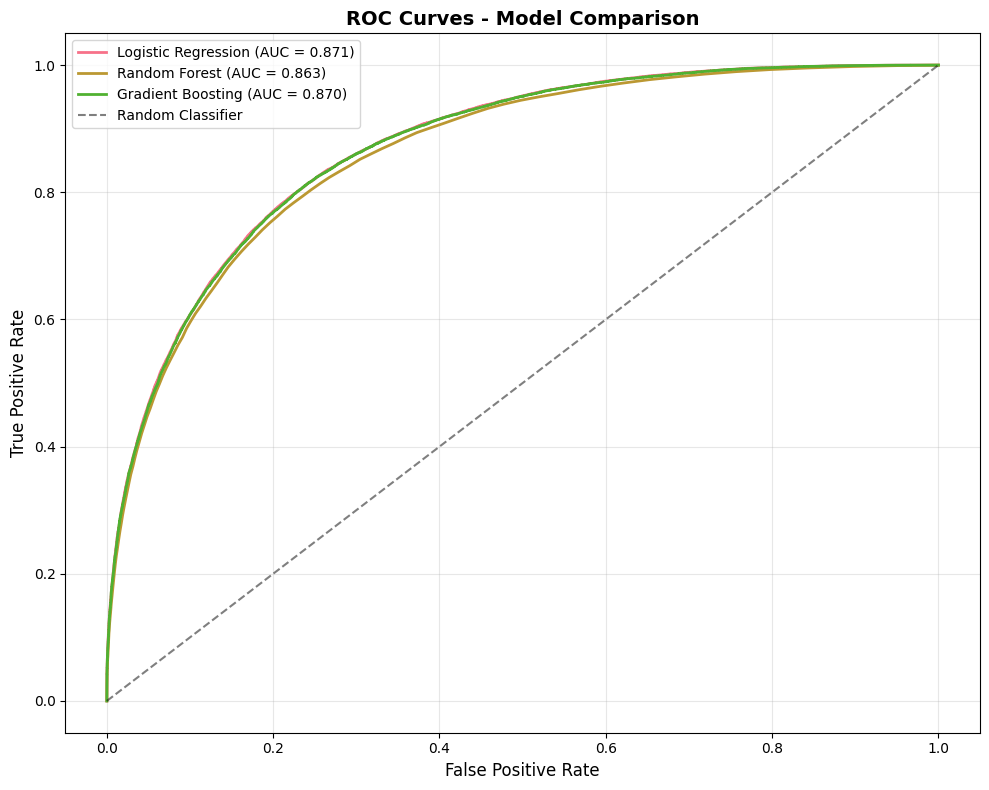

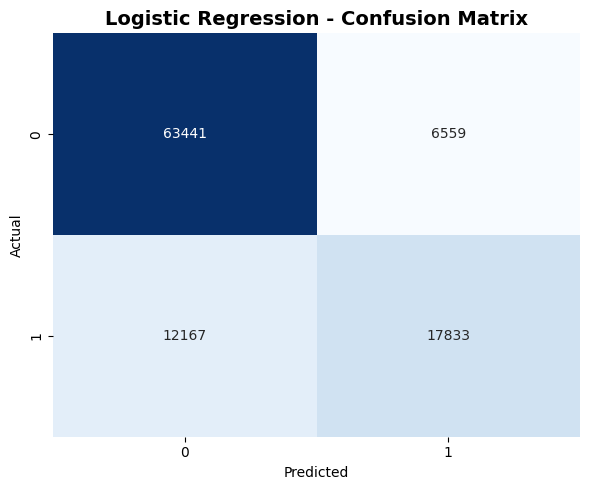

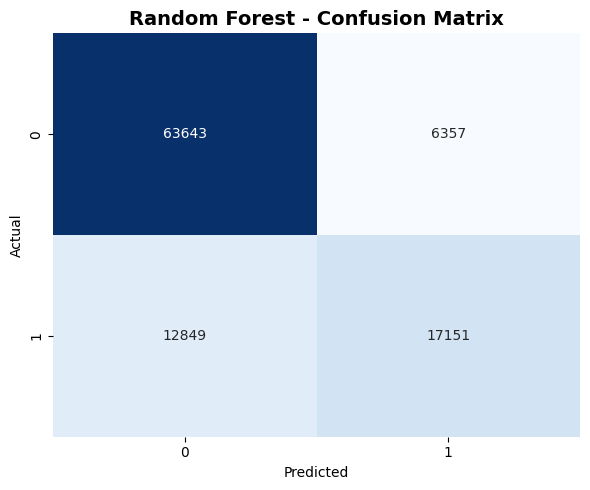

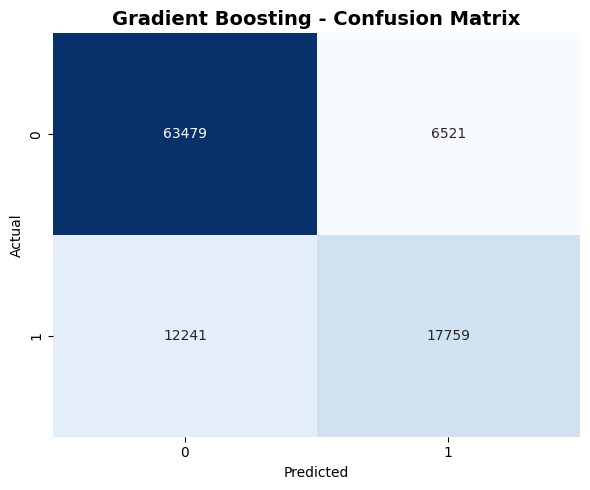

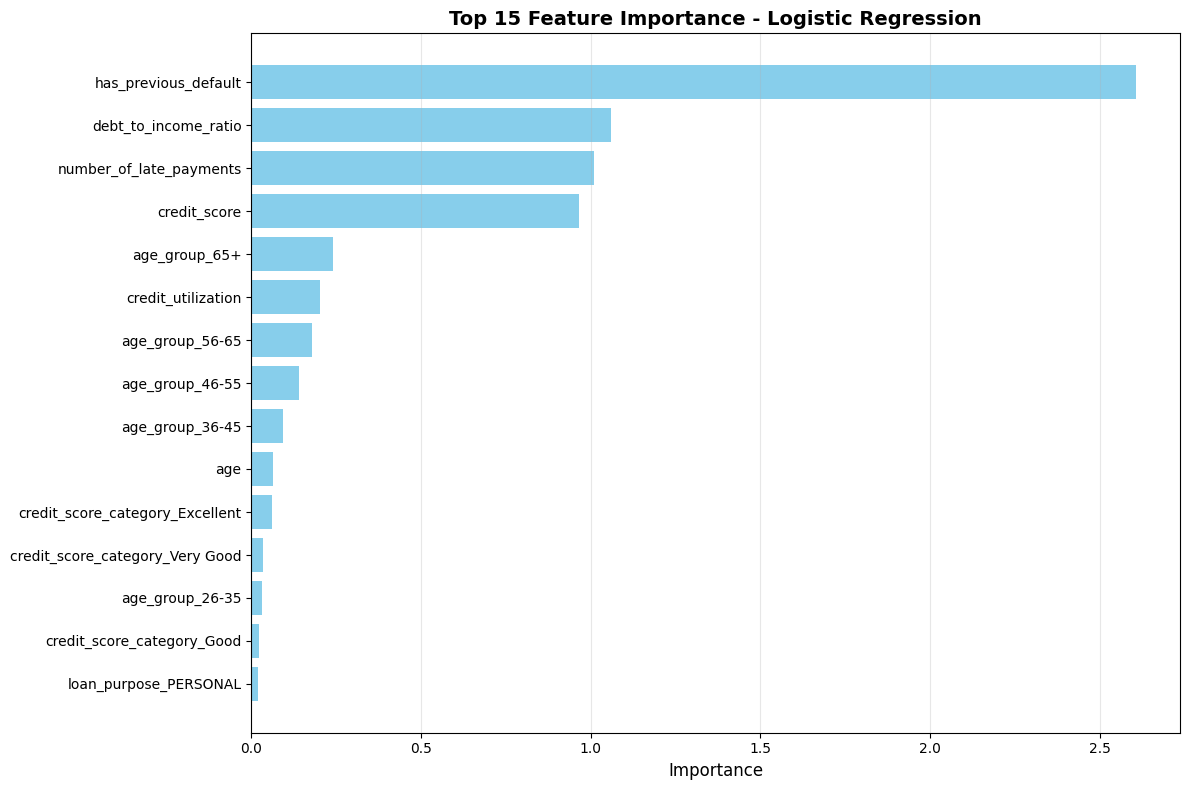


Best Model: Logistic Regression
Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     70000
           1       0.73      0.59      0.66     30000

    accuracy                           0.81    100000
   macro avg       0.79      0.75      0.76    100000
weighted avg       0.81      0.81      0.81    100000

Classification report saved as 'credit_scoring_graphs/classification_report.csv'


In [9]:
# Step 6: Model Evaluation and Visualization

print("=" * 50)
print("MODEL EVALUATION")
print("=" * 50)

# 6.1 ROC Curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc_score"]:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('credit_scoring_graphs/13_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.2 Confusion Matrices - Individual plots
for idx, (name, result) in enumerate(results.items()):
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f'credit_scoring_graphs/14_confusion_matrix_{name.lower().replace(" ", "_")}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# 6.3 Feature Importance for Best Model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

plt.figure(figsize=(12, 8))

if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    })
elif hasattr(best_model, 'coef_'):
    # For logistic regression, use absolute coefficients
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(best_model.coef_[0])
    })
else:
    print("Model doesn't have feature importance method")
    feature_importance = pd.DataFrame()

if not feature_importance.empty:
    feature_importance = feature_importance.sort_values('importance', ascending=True).tail(15)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig(f'credit_scoring_graphs/15_feature_importance_{best_model_name.lower().replace(" ", "_")}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# 6.4 Detailed Classification Report for Best Model
print(f"\nBest Model: {best_model_name}")
print("Detailed Classification Report:")
print(classification_report(y_test, results[best_model_name]['y_pred']))

# Save classification report to file
report = classification_report(y_test, results[best_model_name]['y_pred'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('credit_scoring_graphs/classification_report.csv')
print("Classification report saved as 'credit_scoring_graphs/classification_report.csv'")

CREDIT SCORE CALCULATOR
Credit scores calculated for test set!

Credit Score Distribution in Test Set:
credit_rating
Very Good    39094
Poor         28182
Good         18357
Fair         14367
Name: count, dtype: int64

Sample Predictions:


,actual_default,default_probability,credit_score,credit_rating
342341,0,0.121910,739,Good
430106,0,0.643384,478,Poor
236866,0,0.044187,777,Very Good
178622,0,0.210292,694,Good
68986,1,0.979641,310,Poor
498031,0,0.028020,785,Very Good
74620,0,0.008097,795,Very Good
359839,0,0.013331,793,Very Good
451115,0,0.202371,698,Good
280087,0,0.212348,693,Good


Sample predictions saved as 'credit_scoring_graphs/sample_predictions.csv'


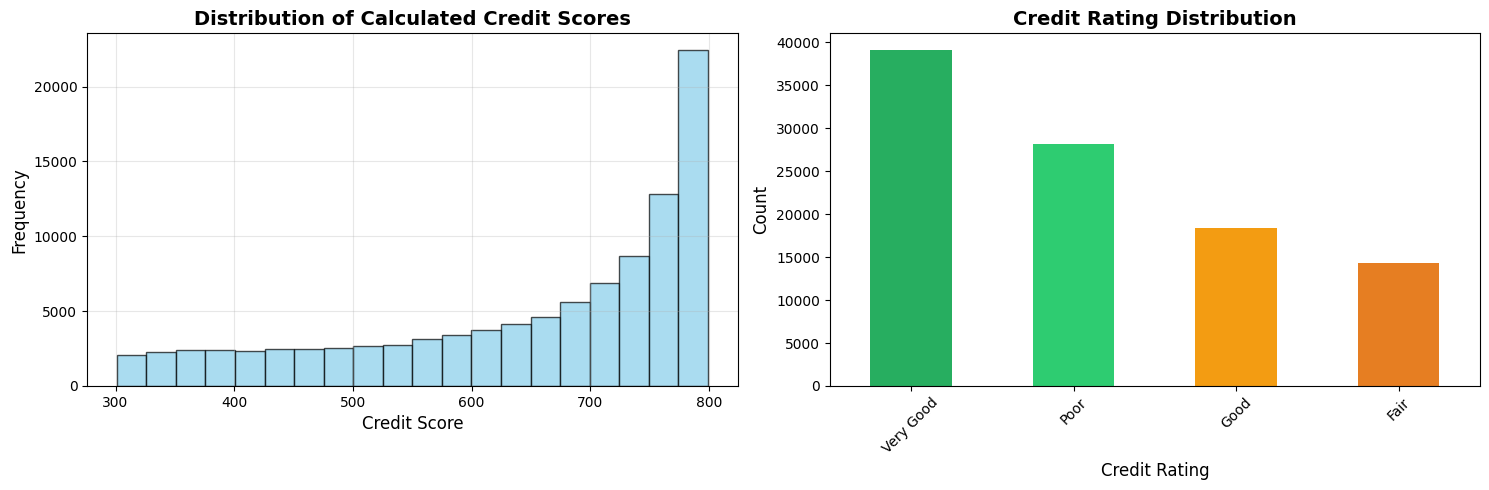


Default Rates by Credit Rating:
credit_rating
Fair         35.76
Good         18.86
Poor         69.64
Very Good     4.54
Name: actual_default, dtype: float64
Default rates by rating saved as 'credit_scoring_graphs/default_rates_by_rating.csv'


In [10]:
# Step 7: Credit Score Calculator

print("=" * 50)
print("CREDIT SCORE CALCULATOR")
print("=" * 50)

def calculate_credit_score(probability, base_score=300, range_score=500):
    """
    Convert default probability to a credit score between 300-850
    Lower probability of default = higher credit score
    """
    # Inverse relationship: lower default probability = higher score
    score = base_score + (1 - probability) * range_score
    return int(np.clip(score, 300, 850))

def get_credit_rating(score):
    """Convert numerical score to credit rating"""
    if score >= 800:
        return "Excellent"
    elif score >= 740:
        return "Very Good"
    elif score >= 670:
        return "Good"
    elif score >= 580:
        return "Fair"
    else:
        return "Poor"

# Calculate credit scores for test set
test_scores = []
for prob in results[best_model_name]['y_pred_proba']:
    score = calculate_credit_score(prob)
    rating = get_credit_rating(score)
    test_scores.append(score)

# Add scores to test data
test_results = X_test.copy()
test_results['actual_default'] = y_test.values
test_results['default_probability'] = results[best_model_name]['y_pred_proba']
test_results['credit_score'] = test_scores
test_results['credit_rating'] = test_results['credit_score'].apply(get_credit_rating)

print("Credit scores calculated for test set!")
print(f"\nCredit Score Distribution in Test Set:")
print(test_results['credit_rating'].value_counts())

# Display sample predictions
print("\nSample Predictions:")
sample_predictions = test_results[['actual_default', 'default_probability', 'credit_score', 'credit_rating']].head(10)
display(sample_predictions)

# Save sample predictions
sample_predictions.to_csv('credit_scoring_graphs/sample_predictions.csv', index=False)
print("Sample predictions saved as 'credit_scoring_graphs/sample_predictions.csv'")

# Visualize credit score distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(test_results['credit_score'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Calculated Credit Scores', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
rating_counts = test_results['credit_rating'].value_counts()
colors = ['#27ae60', '#2ecc71', '#f39c12', '#e67e22', '#e74c3c']  # Green to Red
rating_counts.plot(kind='bar', color=colors)
plt.xlabel('Credit Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Credit Rating Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('credit_scoring_graphs/16_credit_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze default rates by credit rating
print("\nDefault Rates by Credit Rating:")
default_by_rating = test_results.groupby('credit_rating')['actual_default'].mean() * 100
print(default_by_rating.round(2))

# Save default rates by rating
default_by_rating_df = pd.DataFrame(default_by_rating).reset_index()
default_by_rating_df.columns = ['Credit Rating', 'Default Rate (%)']
default_by_rating_df.to_csv('credit_scoring_graphs/default_rates_by_rating.csv', index=False)
print("Default rates by rating saved as 'credit_scoring_graphs/default_rates_by_rating.csv'")

In [12]:
# Step 8: Save the Model and Create Prediction Function - FIXED VERSION

print("=" * 50)
print("MODEL DEPLOYMENT PREPARATION")
print("=" * 50)

# Save the best model
model_filename = f'best_credit_scoring_model.pkl'
joblib.dump(best_model, model_filename)

# Save the scaler
scaler_filename = 'feature_scaler.pkl'
joblib.dump(scaler, scaler_filename)

print(f"Best model saved as: {model_filename}")
print(f"Feature scaler saved as: {scaler_filename}")

# Create a prediction function - FIXED VERSION
def predict_credit_application(customer_data, model, scaler, feature_names):
    """
    Predict creditworthiness for a new customer application
    """
    # Create DataFrame from input data
    customer_df = pd.DataFrame([customer_data])
    
    # Ensure all features are present
    for feature in feature_names:
        if feature not in customer_df.columns:
            customer_df[feature] = 0
    
    # Reorder columns to match training data
    customer_df = customer_df[feature_names]
    
    # Scale numerical features - USE ONLY FEATURES THAT EXIST IN BOTH DATASETS
    customer_df_scaled = customer_df.copy()
    
    # Get the numerical features that actually exist in our current dataset
    existing_numerical_features = [feat for feat in safe_numerical_features if feat in customer_df.columns]
    
    # Scale only the existing numerical features
    customer_df_scaled[existing_numerical_features] = scaler.transform(customer_df[existing_numerical_features])
    
    # Predict probability
    if isinstance(model, LogisticRegression):
        default_probability = model.predict_proba(customer_df_scaled)[0, 1]
    else:
        default_probability = model.predict_proba(customer_df)[0, 1]
    
    # Calculate credit score
    credit_score = calculate_credit_score(default_probability)
    credit_rating = get_credit_rating(credit_score)
    
    # Decision
    decision = "APPROVE" if default_probability < 0.5 else "REJECT"
    
    return {
        'default_probability': round(default_probability, 4),
        'credit_score': credit_score,
        'credit_rating': credit_rating,
        'decision': decision,
        'risk_level': 'Low' if default_probability < 0.3 else 'Medium' if default_probability < 0.7 else 'High'
    }

# Test the prediction function with sample data - UPDATED SAMPLE
print("\nTesting Prediction Function:")
sample_customer = {
    'age': 35,
    'income': 65000,
    'employment_length': 8,
    'loan_amount': 15000,
    'credit_score': 720,
    'debt_to_income_ratio': 0.35,
    'years_at_residence': 5,
    'number_of_credit_lines': 8,
    'number_of_late_payments': 2,
    'credit_utilization': 0.4,
    'has_previous_default': 0,
    'loan_term': 36
    # Removed loan_to_income_ratio and payment_behavior_score since they're not in our dataset
}

# Add encoded features (set to 0 for this example)
for col in X.columns:
    if col not in sample_customer:
        sample_customer[col] = 0

prediction = predict_credit_application(sample_customer, best_model, scaler, X.columns)
print("Sample Prediction Result:")
for key, value in prediction.items():
    print(f"{key:20}: {value}")

# Save prediction function example
with open('credit_scoring_graphs/prediction_example.txt', 'w') as f:
    f.write("Sample Customer Prediction:\n")
    for key, value in prediction.items():
        f.write(f"{key:20}: {value}\n")
print("Prediction example saved as 'credit_scoring_graphs/prediction_example.txt'")

print("\n" + "="*50)
print("NOTEBOOK COMPLETED SUCCESSFULLY!")
print("="*50)

# List all saved files
print("\nSAVED FILES SUMMARY:")
print("-" * 50)
saved_files = os.listdir('credit_scoring_graphs')
for i, file in enumerate(sorted(saved_files), 1):
    print(f"{i:2}. {file}")

print(f"\nTotal graphs and files saved: {len(saved_files)}")
print("\nNext Steps:")
print("1. Use the saved model for new predictions")
print("2. Monitor model performance regularly")
print("3. Retrain model with new data periodically")
print("4. Implement fairness checks for different demographic groups")

MODEL DEPLOYMENT PREPARATION
Best model saved as: best_credit_scoring_model.pkl
Feature scaler saved as: feature_scaler.pkl

Testing Prediction Function:
Sample Prediction Result:
default_probability : 0.0175
credit_score        : 791
credit_rating       : Very Good
decision            : APPROVE
risk_level          : Low
Prediction example saved as 'credit_scoring_graphs/prediction_example.txt'

NOTEBOOK COMPLETED SUCCESSFULLY!

SAVED FILES SUMMARY:
--------------------------------------------------
 1. 10_credit_utilization.png
 2. 11_late_payments.png
 3. 12_loan_vs_income.png
 4. 13_roc_curves.png
 5. 14_confusion_matrix_gradient_boosting.png
 6. 14_confusion_matrix_logistic_regression.png
 7. 14_confusion_matrix_random_forest.png
 8. 15_feature_importance_logistic_regression.png
 9. 16_credit_score_distribution.png
10. 1_target_distribution.png
11. 2_age_distribution.png
12. 3_income_distribution.png
13. 4_credit_score_distribution.png
14. 5_dti_ratio.png
15. 6_employment_length.pn